In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('dataset.csv')
df_train.head()
df_train.columns.values

array(['match', 'iid_1', 'iid_2', 'interested_1', 'interested_2',
       'gender_1', 'age_1', 'field_1', 'field_cd_1', 'race_1',
       'imprace_1', 'imprelig_1', 'goal_1', 'date_1', 'go_out_1',
       'career_1', 'career_c_1', 'sports_1', 'tvsports_1', 'exercise_1',
       'dining_1', 'museums_1', 'art_1', 'hiking_1', 'gaming_1',
       'clubbing_1', 'reading_1', 'tv_1', 'theater_1', 'movies_1',
       'concerts_1', 'music_1', 'shopping_1', 'yoga_1', 'attr3_1_1',
       'sinc3_1_1', 'intel3_1_1', 'fun3_1_1', 'amb3_1_1', 'gender_2',
       'age_2', 'field_2', 'field_cd_2', 'race_2', 'imprace_2',
       'imprelig_2', 'goal_2', 'date_2', 'go_out_2', 'career_2',
       'career_c_2', 'sports_2', 'tvsports_2', 'exercise_2', 'dining_2',
       'museums_2', 'art_2', 'hiking_2', 'gaming_2', 'clubbing_2',
       'reading_2', 'tv_2', 'theater_2', 'movies_2', 'concerts_2',
       'music_2', 'shopping_2', 'yoga_2', 'attr3_1_2', 'sinc3_1_2',
       'intel3_1_2', 'fun3_1_2', 'amb3_1_2'], dtype=objec

In [3]:
missingdata = pd.DataFrame()
missingdata['total'] = df_train.isnull().sum()
missingdata['percent'] = (missingdata['total'] / len(df_train))
missingdata.sort_values('percent', ascending = False).head(10)

,total,percent
career_c_1,99,0.023662
career_1,69,0.016491
intel3_1_1,67,0.016013
amb3_1_1,67,0.016013
fun3_1_1,67,0.016013
sinc3_1_1,67,0.016013
attr3_1_1,67,0.016013
age_1,65,0.015535
tv_1,59,0.014101
hiking_1,59,0.014101


In [4]:
df_train.dropna(axis=0, inplace=True)

In [5]:
df_train.drop(['iid_2', 'iid_1', 'interested_1', 'interested_2'], axis=1, inplace=True)

In [13]:
df_train = pd.get_dummies(df_train)
objects = df_train.loc[:, df_train.dtypes == object]
objects.columns.values

array([], dtype=object)

In [14]:
Y = df_train['match']
X = df_train.drop(['match'], axis=1)

In [15]:
columns = X.columns.values

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [17]:
from imblearn.over_sampling import SMOTE

In [18]:
X_resampled, y_resampled = SMOTE(random_state=12).fit_resample(X, Y)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=.33, random_state=12)

rfc = RandomForestClassifier(random_state=12, n_estimators=1000,  verbose=0, 
                               n_jobs = -1)


                                                                
rfc.fit(x_train, y_train)
test_predictions = rfc.predict(x_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1065
           1       0.98      0.90      0.94      1129

   micro avg       0.94      0.94      0.94      2194
   macro avg       0.94      0.94      0.94      2194
weighted avg       0.94      0.94      0.94      2194



In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
# x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

# clf = GradientBoostingClassifier(verbose=1)
# cv = GridSearchCV(clf, {"learning_rate": [.1, .01], "n_estimators": [3000], 
#                                 'max_features': ['auto']}, scoring='f1')                               
# cv.fit(x_train, y_train)
# print("Best Params: {}".format(cv.best_params_))
# test_predictions = cv.predict(x_test)
# print("Test Classification Report:")
# print(classification_report(y_test, test_predictions))



# #This will run faster if I take out the Cross Fold Validation!

In [40]:
feature_imp = sorted(list(zip(columns, rfc.feature_importances_)), key=lambda x: x[1], reverse=True)
feature_imp[:10]

[('date_2', 0.01892559175000374),
 ('amb3_1_1', 0.017352950647546116),
 ('intel3_1_1', 0.01707722842703119),
 ('gaming_1', 0.016676652395400584),
 ('tvsports_1', 0.01645323837730311),
 ('tv_2', 0.01586444204918938),
 ('concerts_1', 0.015382969245435744),
 ('yoga_1', 0.015227548066596897),
 ('attr3_1_2', 0.014944260385031473),
 ('fun3_1_2', 0.014822332877526025)]

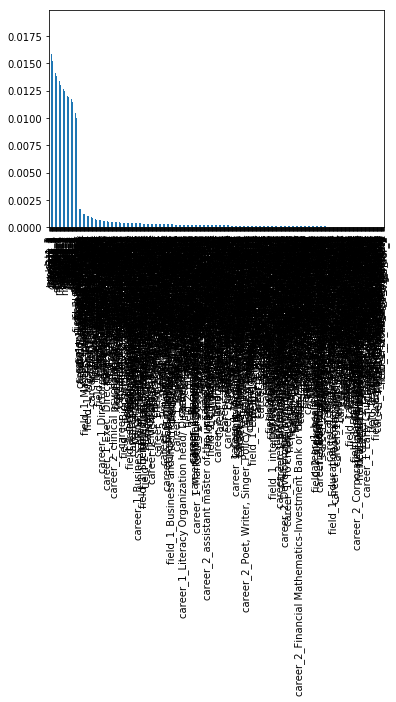

In [47]:
pd.Series([x[1] for x in feature_imp[:]], index=[x[0] for x in feature_imp[:]]).plot(kind='bar')

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)


clf = linear_model.LogisticRegression(penalty='l2')
clf.fit(x_train, y_train)
train_predictions = clf.predict(x_train)
test_predictions = clf.predict(x_test)

test_predictions = clf.predict(x_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions))

Test Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1114
           1       0.77      0.82      0.79      1080

   micro avg       0.79      0.79      0.79      2194
   macro avg       0.79      0.79      0.79      2194
weighted avg       0.79      0.79      0.79      2194



In [36]:
feature_imp = sorted(list(zip(columns, clf.coef_.flatten())), key=lambda x: x[1], reverse=True)
feature_imp[:10]

[('field_2_MBA Finance', 3.029816781750853),
 ('career_1_finance', 2.1138435974680196),
 ('career_1_Director of Training and Development', 1.9558770556051037),
 ('career_1_physician/healthcare', 1.9239269891160278),
 ('career_2_professor, poet/critic', 1.8973597421640784),
 ('career_2_Investment banking', 1.8061657164427058),
 ('career_1_Clinical Psychology', 1.7883855053097633),
 ('field_1_MA Science Education', 1.7778110473575008),
 ('field_2_Art History/medicine', 1.7518173372273567),
 ('career_2_Pediatrics', 1.7518173372273567)]